출처

https://mindscale.kr/course/basic-stat-python/14/

#### 회귀분석
하나나 그 이상의 독립변수들이 종속변수에 미치는 영향을 추정할 수 있는 통계기법이다.

변수들 사이의 인과관계를 밝히고 모형을 적합하여 관심있는 변수를 예측하거나 추론하기 위한 분석방법이다.

독립변수의 개수가 하나이면 단순선형회귀분석, 두개 이상이면 다중선형회귀분석으로 분석할 수 있다.

##### 선형회귀분석의 가정

1. 선형성
    * 입력변수와 출력변수의 관계가 선형이다.(선형회귀분석에서 가장 중요한 가정)
2. 등분산성
    * 오차의 분산이 입력변수와 무관하게 일정하다. 잔차플롯(산점도)를 활용하여 잔차와 입력변수 간에 아무런 관련성이 없게 무작위적으로 고루 분포되어야 등분산성 가정을 만족하게 된다.
3. 독립성
    * 입력변수와 오차는 관련이 없다. 자기상관(독립성)을 알아보기 위해 더빈-왓슨 통계량을 사용하며 주로 시계열 데이터에서 많이 활용한다.
4. 비상관성
    * 오차들끼리 상관이 없다. 
5. 정상성(정규성)
    * 오차의 분포가 정규분포를 따른다. Q-Q Plot, Kolmogolov-smirnov검정, Shapiro-Wilk 검정 등을 활용하여 정규성을 확인한다.

**가정에 대한 검증**: 

단순선형회귀분석일 경우 - 입력변수와 출력변수간의 선형성을 점검하기 위해 산점도를 확인한다.

다중선형회귀분석일 경우 - 선형회귀분석의 가정인 선형성, 등분산성, 독립성, 정상성이 모두 만족하는지 확인해야 한다.

---------
#### 단순선형회귀분석

In [1]:
import pandas as pd
df = pd.read_csv('https://gist.githubusercontent.com/euphoris/f8cc761601d81d8ca077a9fcacf355b5/raw/ce1d79e7659dcf3a965da262bacafe44059802be/cars.csv')
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


산점도에 추세선을 넣어 데이터에 선형적인 패턴이 있는지 확인한다. 아래와 같이 그려보면 대체로 speed가 증가할 수록 dist도 증가하는 관계가 있는 것을 볼 수 있다.

<AxesSubplot:xlabel='speed', ylabel='dist'>

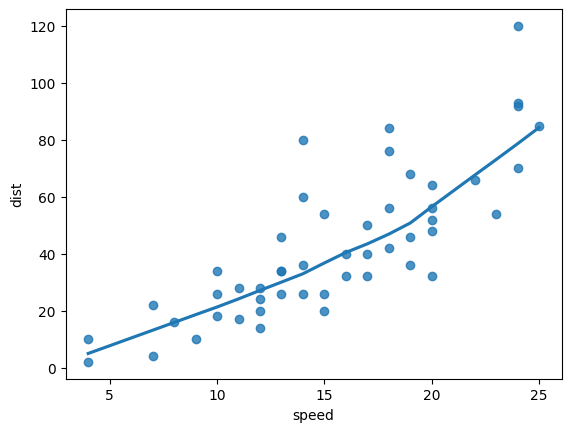

In [2]:
import seaborn as sns

sns.regplot(x='speed',y='dist', data=df, lowess=True)

극단값이 있을 경우 회귀분석의 결과가 왜곡될 수 있다. 상자 그림을 그려서 극단값이 있는지 확인해본다. 아래 그림을 보면 dist에서 값 하나가 크게 위에 있는 것을 볼 수 있다.

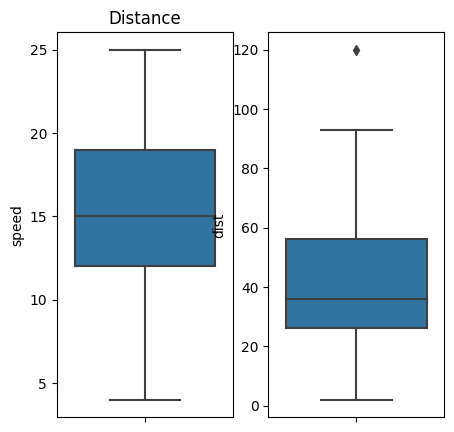

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(5,5))

sns.boxplot(y = 'speed',data=df,ax=axes[0], orient='v')
axes[0].set_title('Speed')

sns.boxplot(y = 'dist',data=df,ax=axes[1], orient='v')
axes[0].set_title('Distance')

plt.show()

선형회귀분석은 독립변수와 종속변수가 정규분포를 따를 때 잘 작동한다. 밀도 플롯(density plot)을 그려서 정규분포의 형태인지 확인해본다.

Text(0.5, 1.0, 'Distance')

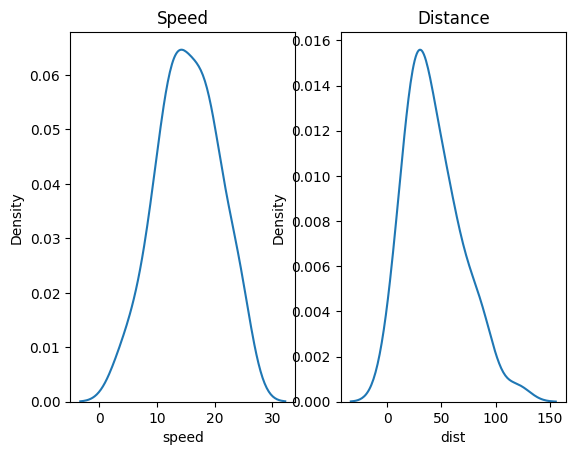

In [4]:
# 1행 2열 형태로 2개의 그래프를 그린다
fig, (ax1, ax2) = plt.subplots(1, 2)  

# speed의 밀도 플롯
sns.kdeplot(df['speed'], ax=ax1)
ax1.set_title('Speed')

# dist의 밀도 플롯
sns.kdeplot(df['dist'], ax=ax2)
ax2.set_title('Distance')

대체로 중심부에 데이터가 몰려있고 좌우로 갈 수록 줄어드는 정규분포와 비슷한 형태를 보인다. 앞에서 봤듯이 dist에 위로 치우친 값이 있기 하나 있기 때문에 밀도 플롯도 오른쪽으로 약간 늘어진 모습을 보인다.

데이터가 치우친 정도를 나타내는 왜도(skewness)를 구해본다. 

In [5]:
import scipy.stats

scipy.stats.skew(df['speed'])

-0.11395477012828319

In [6]:
scipy.stats.skew(df['dist'])

0.7824835173114966

speed는 왜도가 -0.11이다 오른쪽으로 약간 치우쳤다는 것을 뜻한다. dist의 왜도는 0.76으로 왼쪽으로 어느 정도 치우쳤다. 위에서 그래프로 본 것과 비슷한 결과이다.

문제가 심각해보이지는 않으므로 일단 분석을 실시해보자.

In [7]:
from statsmodels.formula.api import ols

res = ols('dist ~ speed', data=df).fit()
# ols 함수로 회귀분석을 실시한다. 종속변수 ~ 독립변수의 형태로 모형식을 쓴다. 

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           1.49e-12
Time:                        16:29:21   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

참고

- 결정계수(R^2)가 낮다면, 회귀식의 설명력은 낮다고 할 수 있음.

- 주의해야할 것은 결정계수(R^2)값이 낮다고해서 회귀식이 통계적으로 유의미하지 않다고 할 순 없음

- 통계적 유의성은 회귀계수에 대한 t-통계량 및 회귀식에 대한 F-통계량을 통해서 계산된 p-value를 통해서 판단해야 함

아래는 모형이 데이터에 잘 맞는 정도를 보여주는 지표들이다.

R-squared: 0.6511

* R제곱
* 모형 적합도(혹은 설명력)
* dist의 분산을 speed가 약 65%를 설명한다
* 각 사례마다 dist에 차이가 있다.

Adj. R-squared: 0.6438

* 독립변수가 여러 개인 다중회귀분석에서 사용
* 독립변수의 개수와 표본의 크기를 고려하여 R-squared를 보정
* 서로 다른 모형을 비교할 때는 이 지표가 높은 쪽은 선택한다

F-statistic: 89.57, Prob(F-statistic): 1.49e-12

* 회귀모형에 대한 (통계적) 유의미성 검증 결과, 유의미함 (p < 0.05)
* 즉, 이 모형은 주어진 표본 뿐 아니라 모집단에서도 의미있는 모형이라 할 수 있음

로그 우도: 종속변수가 정규분포라 가정했을 때 그 우도

* 로그우도도 R제곱과 마찬가지로 독립변수가 많아지면 증가한다
* AIC, BIC: 로그우도를 독립변수의 수로 보정한 값 (작을 수록 좋다)

============================================================

Coef는 데이터로부터 얻은 계수의 추정치를 말한다.

절편(Intercept)의 추정치는 -17.5791로, speed가 0일 때 dist의 값이다.

speed의 계수 추정치는 3.9324로 speed가 1 증가할 때마다 dist가 3.9324 증가한다는 것을 의미한다.

이를 수식으로 정리하면 아래와 같다.

dist = -17.5791 + 3.9324 x speed

추정치의 표 중간의 P(>|t|)는 모집단에서 계수가 0일 때, 현재와 같은 크기의 표본에서 이러한 계수가 추정될 확률인 p값을 나타낸다. 

이 확률이 매우 작다는 것은, 모집단에서 speed의 계수가 정확히 3.9324는 아니더라도 현재의 표본과 비슷하게 0보다 큰 어떤 범위에 있을 가능성이 높다는 것을 의미한다. 

보통 5%와 같은 유의수준을 정하여 p값이 그보다 작으면(p < 0.05), "통계적으로 유의미하다"라고 한다.

즉, speed가 증가할 때 기대되는 dist의 변화는 유의수준 5%에서 통계적으로 유의미하다.

============================================================

**결과보고**

dist에 대하여 speed로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의미하였다(F(1,48) = 89.57, p < 0.05).

speed의 회귀계수는 3.9324로, dist에 대하여 유의미한 예측변인인 것으로 나타났다(t(48) = 9.464, p < 0.05).

---------
#### 다중선형회귀분석

* 회귀계수의 유의성은 단변량 회귀분석의 회귀계수 유의성 검토와 같이 t통계량을 통해 확인한다
* 모든 회귀계수의 유의성이 통계적으로 검증되어야 선택된 변수들의 조합으로 모형을 확인할 수 있다.

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/euphoris/f8cc761601d81d8ca077a9fcacf355b5/raw/46f23ba0efdbf315fcf9536b83a7c417590cd259/crab.csv')
df.head()

,crab,sat,y,weight,width,color,spine
0,1,8,1,3.05,28.3,2,3
1,2,0,0,1.55,22.5,3,3
2,3,9,1,2.30,26.0,1,1
3,4,0,0,2.10,24.8,3,3
4,5,4,1,2.60,26.0,3,3


In [9]:
model = ols('y~sat+weight+width',data=df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     59.69
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           2.30e-26
Time:                        16:29:22   Log-Likelihood:                -55.831
No. Observations:                 173   AIC:                             119.7
Df Residuals:                     169   BIC:                             132.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9366      0.500     -1.872      0.063      -1.924       0.051
sat            0.0971      0.009     11.018      0.000       0.080       0.115
weight        -0.0465      0.098     -0.475      0.635      -0.240       0.147
width          0.0535      0.026      2.023      0.045       0.001       0.106
==============================================================================
Omnibus:                       29.724   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.545
Skew:                           0.086   Prob(JB):                       0.0230
Kurtosis:                       1.992   Cond. No.                         526.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

결과를 보면 유의수준 5%에서 sat와 width는 통계적으로 유의미하고, weight는 유의미하지 않게 나왔다.

==========================================================

공선성(collinearity): 하나의 독립변수가 다른 하나의 독립변수로 잘 예측되는 경우, 또는 서로 상관이 높은 경우

다중공선성(multicollinearity): 하나의 독립변수가 다른 여러 개의 독립변수들로 잘 예측되는 경우

**다중공선성이 있으면**

* 계수 추정이 잘 되지 않거나 불안정해져서 데이터가 약간만 바뀌어도 추정치가 크게 달라질 수 있다

* 계수가 통계적으로 유의미하지 않은 것처럼 나올 수 있다

**다중공선성의 진단**

분산팽창계수(VIF, Variance Inflation Factor)를 구하여 판단

엄밀한 기준은 없으나 보통 10보다 크면 다중공선성이 있다고 판단(5를 기준으로 하기도 함)

**다중공선성의 대처**

* 다중선형회귀분석에서 다중공선성의 문제가 발생하면, 문제가 있는 변수를 제거하거나 주성분회귀, 능형회귀 모형을 적용하여 문제를 해결한다.

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

model.exog_names
#모형식에서 독립변수는 절편, sat, weight, width 순이다.

['Intercept', 'sat', 'weight', 'width']

In [11]:
variance_inflation_factor(model.exog, 1)
#X의 1번째 독립변수 sat의 VIF를 계산한다.

1.15883687808578

In [12]:
variance_inflation_factor(model.exog, 2)
#X의 2번째 독립변수 weight의 VIF를 계산한다.

4.80167942403924

In [13]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,sat,1.158837
1,weight,4.801679
2,width,4.688660


weight와 width의 VIF가 각각 4.8과 4.6이다. 게의 무게(weight)와 너비(width)는 서로 상관이 높기 때문에 VIF가 약간 높게 나타나는 것이다.

* 계수가 통계적으로 유의미하지 않다면 대처
    * 계수가 통계적으로 유의미하다면 VIF가 크더라도 특별히 대처할 필요없음
* 변수들을 더하거나 빼서 새로운 변수를 만든다
    * (개념적으로나 이론적으로) 두 예측변수를 더하거나 빼더라도 문제가 없는 경우
        * 예) 남편의 수입과 아내의 수입이 서로 상관이 높다면, 두 개를 더해 가족 수입이라는 하나의 변수로 투입한다
* 더하거나 빼기 어려운 경우는 변수를 모형에서 제거한다
    * 단, 변수를 제거하는 것은 자료의 다양성을 해치고, 분석하려던 가설이나 이론에 영향을 미칠 수 있기 때문에 가급적 자제

weight와 width가 VIF 기준을 넘는 것은 아니지만 실험삼아 width를 제거해보자.

In [14]:
model = ols('y ~ sat + weight', df)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     85.93
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           1.63e-26
Time:                        16:29:25   Log-Likelihood:                -57.901
No. Observations:                 173   AIC:                             121.8
Df Residuals:                     170   BIC:                             131.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0495      0.114      0.433      0.665      -0.176       0.275
sat            0.0976      0.009     10.982      0.000       0.080       0.115
weight         0.1260      0.049      2.598      0.010       0.030       0.222
==============================================================================
Omnibus:                       40.033   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.709
Skew:                           0.121   Prob(JB):                       0.0128
Kurtosis:                       1.928   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

이전의 분석에서는 weight가 유의미하지 않게 나왔지만, width를 제거한 후에는 유의미하게 나왔다. weight와 width가 공선성이 있기 때문에 width를 제거하자 weight가 유의미해진 것으로 볼 수 있다.

--------------------------------
#### 잔차분석(회귀진단)
잔차분석이란 회귀모형에 대한 가정들(정규성, 등분산성, 독립성)의 충족여부에 대한 검토와 이상값의 개입여부에 대한 검토절차를 말한다.

회귀분석을 다 수행한 후에 하는건지 전에 하는건지는 잘 모르겠으나 참고한 웹페이지에서는 후에 잔차분석을 하고 있으니 여기서도 순서를 따른다.

시험에 나오게 된다면 회귀분석 후에 잔차분석을 수행하고 가정들을 만족한다면, "가정을 만족한다" 이렇게 서술하면 될 것 같고, 만약 만족하지 못한다면 "가정을 만족하지 못하기 때문에 결과를 신뢰할 수 없다." 이렇게 적으면 될까?

아니면 이상치를 제거하거나 log 변환을 진행하는 등의 변환을 수행하고 다시 회귀분석을 수행해도 될 것 같다.

회귀모델 진단 결과로 회귀모델 가정이 위배되었다는 것을 알았을 때 회귀모델의 수정이 필요하다.

* 관측값 제거, 변수 변환, 변수 추가/제거
  * 이상점/영향점 => 관측값 제거
  * 선형적, 정규성, 등분산성 미충족 => 변수 변환
  * 선형성의 가정을 위배 => 독리변수를 변환
  * 정규성.등분산 가정을 위배 => 종속변수를 변환
  * 다중공선성 => 변수 제거

가장 쉬운 방법은 Stepwise로 4가지 기본가정을 위배시키는 변수를 제거하는 것이다.
출처: https://kkokkilkon.tistory.com/175 [꼬낄콘의 분석일지:티스토리]

##### 예시

위의 다중회귀에서 sat, weight 만을 활용한 다중선형회귀를 바탕으로 잔차분석을 수행한다.

In [15]:
model = ols('y ~ sat + weight', df)
res = model.fit()

df

,crab,sat,y,weight,width,color,spine
0,1,8,1,3.050,28.3,2,3
1,2,0,0,1.550,22.5,3,3
2,3,9,1,2.300,26.0,1,1
3,4,0,0,2.100,24.8,3,3
4,5,4,1,2.600,26.0,3,3
...,...,...,...,...,...,...,...
168,169,3,1,2.750,26.1,3,3
169,170,4,1,3.275,29.0,3,3
170,171,0,0,2.625,28.0,1,1
171,172,0,0,2.625,27.0,4,3


In [16]:
fitted = res.predict(df[['sat','weight']]) #fitted: 예측값
residual = df['y'] - fitted #residual:잔차

##### 모형의 선형성

* 예측값(fitted)과 잔차(residual)의 비교
* 모든 예측값에서 잔차가 비슷하게 있어야 함(가운데 점선)
* 빨간 실선은 잔차의 추세를 나타냄
* 빨간 실선이 점선에서 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것
* 아래는 예측값에 따라 잔차가 크게 달라지는 것으로 보임(예측값이 작으면 0.75 만큼 차이가 나고 크면 반대가 되는 경향)

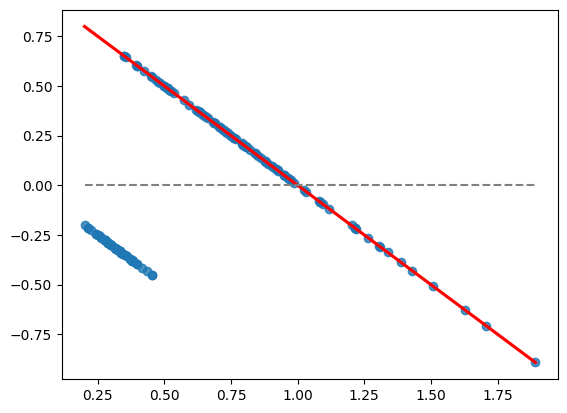

In [17]:
sns.regplot(x=fitted, y=residual, lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(),fitted.max()],[0,0],'--',color='grey')
plt.show()

##### 잔차의 정규성

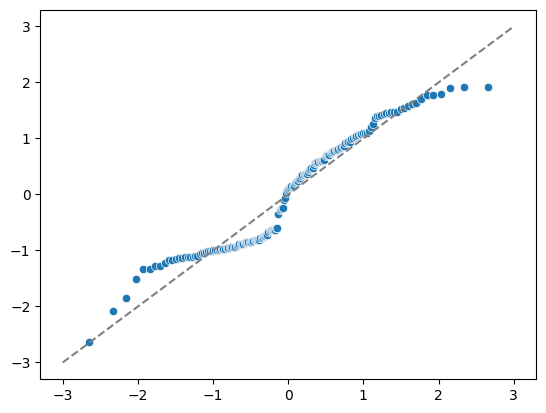

In [18]:
import scipy.stats

sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

sns.scatterplot(x=x, y=y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

In [19]:
scipy.stats.shapiro(residual)
#p값이 0.05보다 작으므로 정규성 위반

ShapiroResult(statistic=0.9373326897621155, pvalue=7.255232503666775e-07)

##### 잔차의 등분산성

* 회귀모형을 통햬 예측된 값이 크던 작던, 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
* 아래 그래프는 예측값(가로축)에 따라 잔차가 어떻게 달라지는지 보여줌
* 빨간색 실선이 수평선을 그리는 것이 이상적
* 아래 그래프를 보면 등분산 또한 위반한 것을 확인할 수 있음.

<AxesSubplot:>

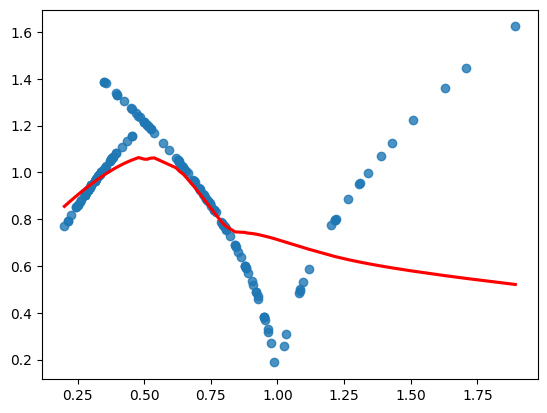

In [20]:
import numpy as np

sns.regplot(x=fitted, y=np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

#### 극단값

In [21]:
from statsmodels.stats.outliers_influence import OLSInfluence

cd, _ = OLSInfluence(res).cooks_distance
cd.sort_values(ascending=False).head()

55     0.256647
14     0.162966
140    0.082144
116    0.069112
12     0.035707
dtype: float64

##### 잔차의 독립성

* 회귀분석에서 잔차는 정규성, 등분상성 그리고 독립성을 가지는 것으로 가정
* 자료 수집 과정에서 무작위 표집(random sampling)을 하였다면, 잔차의 독립성은 만족하는 것으로 봄
* 시계열 자료나 종단연구 자료처럼, 연구 설계 자체가 독립성을 담보할 수 없는 경우에는 더빈-왓슨 검정(Durbin-Watson test) 등을 실시

res.summary()의 Durbin-Watson 검정으로 확인한다.

DW 검정은 잔차의 독립성을 확인할 수 있는 수치로, 0이면 잔차들이 양의 자기상관을 갖고 2이면 자기상관이 없는 독립, 4이면 잔차들이 음의 자기상관을 갖는다고 해석한다.

보통 1.5~2.5 사이이면 독립으로 판단하고 회귀모형이 적합하다는 것을 의미한다. DW 검정값이 0또는 4에 가깝다는 것은 잔차들이 자기상관을 가지고 있다는 의미이고 이는 t값, F값, R 제곱을 실제보도 증가시켜 실제로 유의미하지 않은 결과를 유의미한 결과로 왜곡하게 된다.

위 회귀분석에서 더빈왓슨 검정이 1.433으로 독립성이 있다고 판단할 수 있다.

#### 잔차 분석 결과를 바탕으로 대응

* 잔차 분석 결과에 따라 다양한 방식의 대응이 가능
    * 극단값을 제거
    * 독립변수를 추가
    * 종속변수를 수학적으로 변환

* 위의 예에서는 55,14번 자료가 극단값으로 보이고 이 때문에 잔차의 정규성이 위배되는 것으로 추측된다. 따라서 55, 14번 자료를 제거하고 다시 분석을 시도해볼 수 있다.

-----------------------
#### 변수선택법

In [22]:
model = ols('y~sat+weight+width',data=df)
res = model.fit()
res.summary()

,crab,sat,y,weight,width,color,spine
0,1,8,1,3.050,28.3,2,3
1,2,0,0,1.550,22.5,3,3
2,3,9,1,2.300,26.0,1,1
3,4,0,0,2.100,24.8,3,3
4,5,4,1,2.600,26.0,3,3
...,...,...,...,...,...,...,...
168,169,3,1,2.750,26.1,3,3
169,170,4,1,3.275,29.0,3,3
170,171,0,0,2.625,28.0,1,1
171,172,0,0,2.625,27.0,4,3


#### 전진선택법

* 전진 선택법은 기존 모형에 가장 설명력이 좋은 변수를 하나씩 추가하는 방법
  
* p-value 값과 미리 정해둔 유의수준 alpha와 비교하여 p-value<alpha이면 변수에 포함시키고 계속해서 진행
  
* 구현 과정이 간단하고 변수가 많은 상황에서도 사용할 수 있다는 장점이 있지만 한번 선택된 변수는 계속 모형에 존재하며, 일치성(샘플수가 많아질수록 실제 모형에 수렴하는 성질)이 만족되지 않는다는 단점이 있다.

* 1단계: 아직 모형의 적합시키지 않은 변수 x를 기존 모형에 추가하여 적합한다. 기존 모형에 추가하여 적합한다는 말은 기존 모형에 있었던 변수와 추가된 변수를 이용하여 선형 모형을 적합한다는 뜻.
  
* 2단계: 변수 Xk에 대한 회귀 계수 bk를 구하고 bk에 대한 t 통계량을 계산한다. 그리고 t 통계량에 대응하는 p-value를 구한다. 이 작업을 X~에 있는 모든 변수에 대해서 수행한다.

* 3단계: 이때 최소 p-value 값을 가지는 변수의 p-value와 미리 정해둔 유의수준 α와 비교한다. 만약 최소 p-value < α이면 최소 p-value에 해당하는 변수를 S에 포함시키고 1~2단계를 수행한다. 그렇지 않은 경우에는 알고리즘을 종료한다.

In [26]:
import statsmodels.api as sm

variables = ['sat','weight','width']

y = df['y']
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

c:\Users\whgur\Desktop\workspace\ADP\adp\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app
c:\Users\whgur\Desktop\workspace\ADP\adp\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app
c:\Users\whgur\Desktop\workspace\ADP\adp\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app


In [27]:
selected_variables

['sat', 'width']

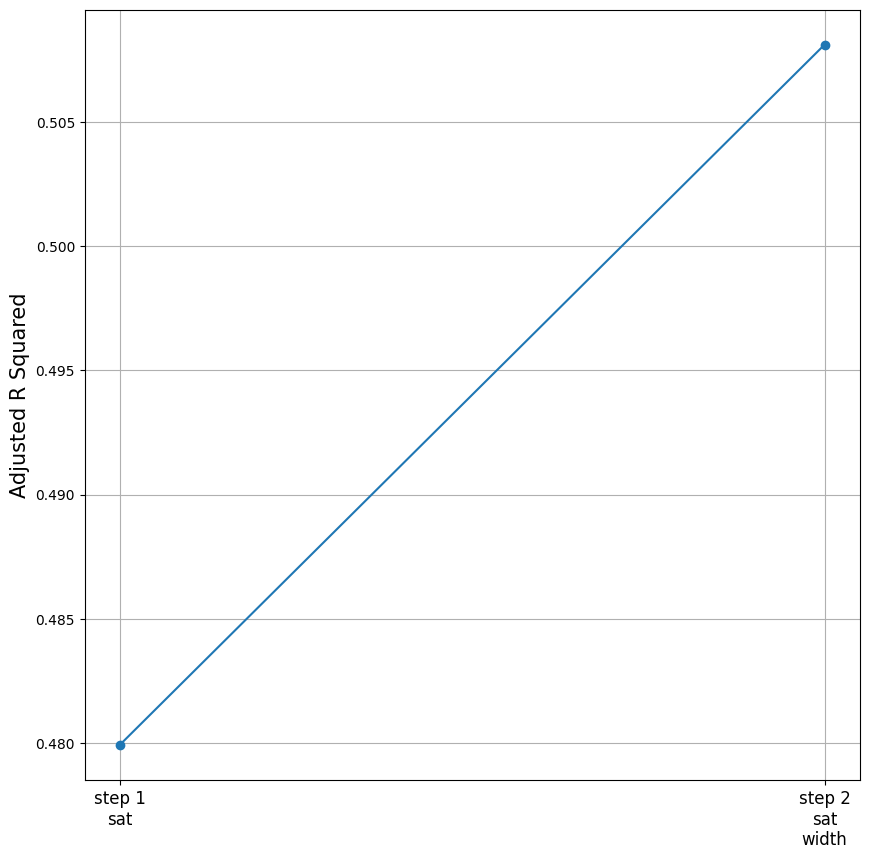

In [28]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

#### 후진소거법

* 후진 소거법은 전진 선택법과는 반대로 모든 변수가 포함된 모형에서 설명력이 가정 적은 변수를 제거해나가는 방법.

* 1 단계) 현재 모형에 포함된 변수를 이용하여 선형 모형을 적합. 

* 2 단계) 추정된 (절편항을 제외한) 회귀 계수에 대하여 가장 큰 p-value를 값을 구한다.

* 3 단계) 만약 p-value에 최대값이 사전에 정의한 유의수준 α 보다 크다면 최대 p-value에 대응하는 변수를 기존 모형에서 제외. 그렇지 않다면 후진 소거법 알고리즘을 종료.

* 후진 소거법 또한 전진 선택법과 마찬가지로 구현 과정이 간단하고 변수가 많은 데이터에 적용 가능하다는 장점이 있다. 하지만 한번 제외된 변수는 다시는 모형에 포함될 수 없으며, 일치성을 만족하지 않는 단점이 있다.

In [29]:
variables = ['sat','weight','width']

y = df['y']
selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(df[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [30]:
selected_variables

['sat', 'width']

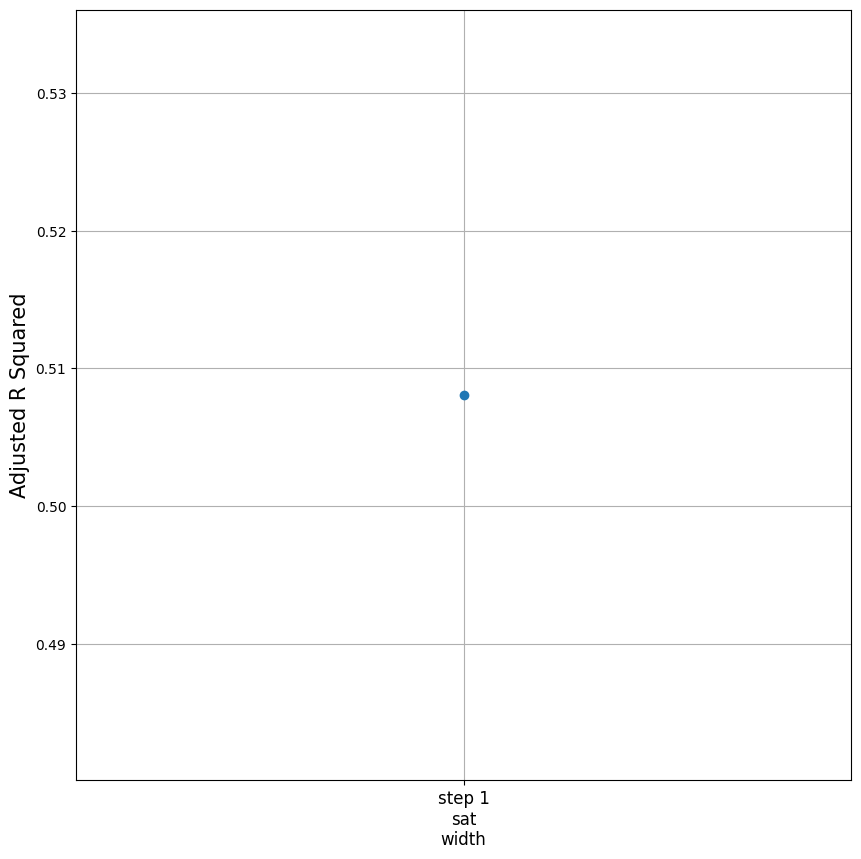

In [31]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

#### 단계선택법

* 단계별 선택법은 전진 선택법에서 후진 소거법을 추가한 방법입니다. 단계별 선택법의 과정은 다음과 같습니다.

 

* 1 단계) ~ 2 단계)는 전진 선택법과 동일.


* 3 단계) 최소 p-value 값과 미리 정해둔 유의수준 α와 비교합니다. 만약 최소 p-value < α이면 최소 p-value에 해당하는 변수를 S에 포함시키고 4단계로 넘어갑니다. 그렇지 않은 경우에는 알고리즘을 종료합니다.

* 4 단계) 추가된 변수를 포함하여 현재 S에 있는 모든 변수를 이용하여 선형 모형을 적합합니다. 그리고 추정된 회귀 변수(절편항 제외)에 대하여 가장 큰 p-value 값을 구합니다.

* 5 단계) 최대 p-value 값이 사전에 정의된 유의 수준보다 크거나 같으면 해당 변수를 제외하고 1단계로 넘어갑니다. 그렇지 않은 경우에는 제외하는 변수 없이 바로 1단계로 넘어갑니다.

In [33]:
variables = ['sat','weight','width']

y = df['y']
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

c:\Users\whgur\Desktop\workspace\ADP\adp\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
c:\Users\whgur\Desktop\workspace\ADP\adp\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
c:\Users\whgur\Desktop\workspace\ADP\adp\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [34]:
selected_variables

['sat', 'width']

#### R로 하는 변수선택법

forw <- lm(medv ~ 1,data=BostonHousing)  # 상수항만 활용하여 회귀분석 실시

back <- lm(medv ~ .,data=BostonHousing)  #모든 변수를 활용하여 회귀분석 실시

* forward
  * step(forw, direction = "forward", scope=list(lower=forw, upper=back))

* backward
  * step(back, direction = "backward")

* stepwise
  * step(forw, direction = "both", scope=list(upper=back))